In [1]:
import sys, pkgutil, platform
print("Python:", sys.version)
print("Exe:", sys.executable)
print("Platform:", platform.platform())
print("Has qiskit?", pkgutil.find_loader("qiskit") is not None)



Python: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
Exe: c:\Projektit\quantum-experiments\.venv\Scripts\python.exe
Platform: Windows-10-10.0.26200-SP0
Has qiskit? False


# 🧠 Quantum Demo – Bell State & VQE Simulation (AI-assisted)

In [2]:
%pip install qiskit qiskit-aer matplotlib numpy


  Using cached qiskit-2.2.2-cp39-abi3-win_amd64.whl.metadata (13 kB)
  Using cached qiskit_aer-0.17.2-cp311-cp311-win_amd64.whl.metadata (8.5 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached rustworkx-0.17.1-cp39-abi3-win_amd64.whl.metadata (10 kB)
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.5.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using ca


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


This notebook demonstrates a Bell entanglement and a simple Variational Quantum Eigensolver (VQE) energy minimization using Qiskit Aer.

In [1]:
import sys, pkgutil, platform
print("Python:", sys.version)
print("Exe:", sys.executable)
print("Platform:", platform.platform())
print("Has qiskit?", pkgutil.find_loader("qiskit") is not None)


Python: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
Exe: c:\Projektit\quantum-experiments\.venv\Scripts\python.exe
Platform: Windows-10-10.0.26200-SP0
Has qiskit? True


In [6]:
%matplotlib inline
from qiskit import Aer, QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
import matplotlib, qiskit
print("matplotlib:", matplotlib.__version__)
print("qiskit:", qiskit.__qiskit_version__)


matplotlib: 3.10.7


AttributeError: module 'qiskit' has no attribute '__qiskit_version__'

In [ ]:
# Create and simulate a Bell state
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(bell).result()
statevector = result.get_statevector()
print('Bell state amplitudes:\n', statevector)

# Visualize the circuit and the Bloch representation
bell.draw('mpl')
plot_bloch_multivector(statevector, title='Bell State Bloch Representation')

In [2]:
import sys, platform, importlib
print("Python:", sys.version)
print("Exe:", sys.executable)
print("Platform:", platform.platform())

# Versiot turvallisesti
from importlib.metadata import version, PackageNotFoundError
def v(name):
    try:
        return version(name)
    except PackageNotFoundError:
        return "not installed"

print("qiskit:", v("qiskit"))
print("qiskit-aer:", v("qiskit-aer"))
print("matplotlib:", v("matplotlib"))


Python: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
Exe: c:\Projektit\quantum-experiments\.venv\Scripts\python.exe
Platform: Windows-10-10.0.26200-SP0
qiskit: 2.2.2
qiskit-aer: 0.17.2
matplotlib: 3.10.7


In [ ]:
# Simple VQE demonstration for Hamiltonian H = ZI + IZ
theta = Parameter('theta')
phi = Parameter('phi')

ansatz = QuantumCircuit(2)
ansatz.ry(theta, 0)
ansatz.ry(phi, 1)
ansatz.cx(0, 1)

hamiltonian = SparsePauliOp.from_list([('ZI', 1.0), ('IZ', 1.0)])
hamiltonian_matrix = hamiltonian.to_matrix()

grid = np.linspace(0, 2 * np.pi, 40)
best_energy = None
best_params = None

for theta_val in grid:
    for phi_val in grid:
        bound = ansatz.bind_parameters({theta: theta_val, phi: phi_val})
        state = Statevector.from_instruction(bound)
        vector = state.data
        energy = np.real(np.vdot(vector, hamiltonian_matrix @ vector))
        if best_energy is None or energy < best_energy:
            best_energy = energy
            best_params = (theta_val, phi_val)

optimal_circuit = ansatz.bind_parameters({theta: best_params[0], phi: best_params[1]})
print(f'Minimum energy: {best_energy:.4f}')
print(f'Optimal parameters (theta, phi): ({best_params[0]:.3f}, {best_params[1]:.3f})')

optimal_circuit.draw('mpl')

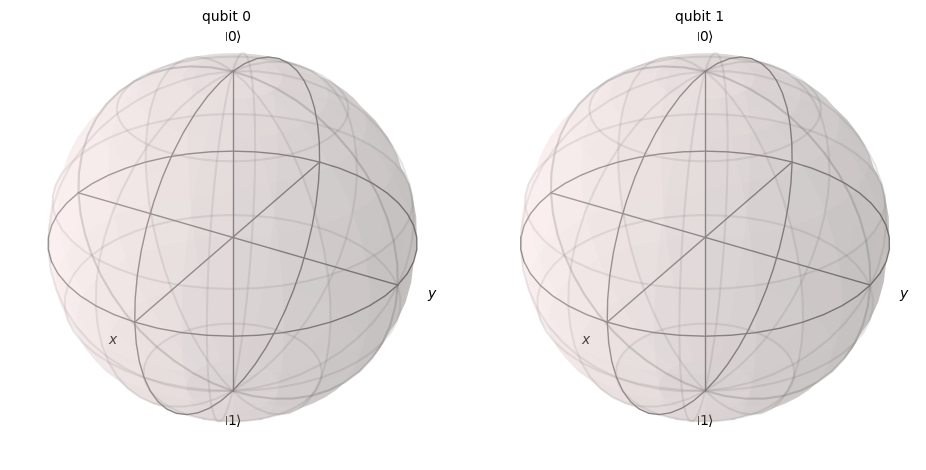

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [3]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# Bell-tila
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

# Tilavektori ja Bloch-kuva
sv = Statevector.from_instruction(bell)
plot_bloch_multivector(sv)
plt.show()

# Piirikaavio
bell.draw("mpl")
plt.show()


This demo was generated and refined using VS Code + OpenAI Codex integration.

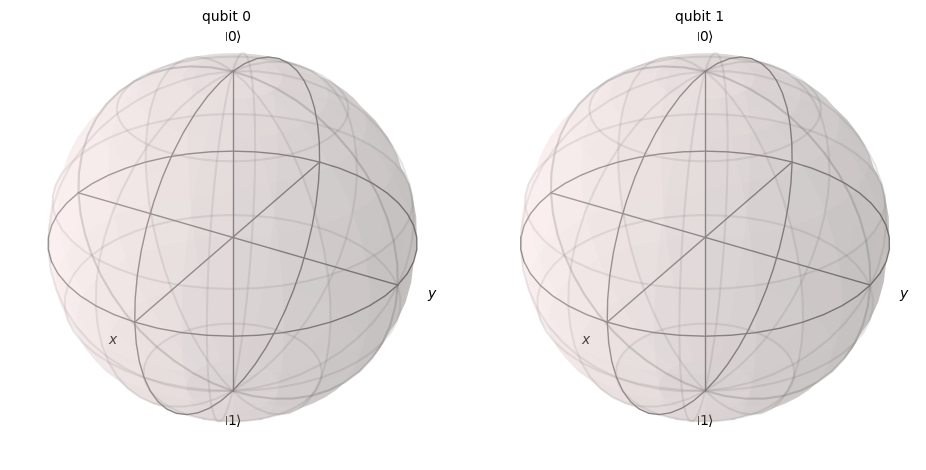

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [1]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

sv = Statevector.from_instruction(bell)
plot_bloch_multivector(sv)
plt.show()

bell.draw("mpl")
plt.show()


In [2]:
%pip install pylatexenc


  Using cached pylatexenc-2.10-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
